# 01 Qubits, Gates, and Bloch Spheres

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import numpy as np
from typing import List

In this notebook, the only code that should to change are in the parameters dictionaries called `params`.

Some sections of the notebook call functions from earlier sections, thus running out of order could lead to `NameErrors` being raised.

*Note: in Python, use $j$ as the imagery unit ($j=\sqrt{-1}$).*

# Qubits

A qubit is the fundamental unit of quantum information, analogous to the classical bit. Commonly, it is described as a “superposition of both 1 and 0”, but what does this mean mathematically?

Like a lot of things in quantum mechanics, we represent a qubit as a linear combination of basis states. More specifically we will only need two basis states for a qubit as any binary number system has only two digits:
$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle \tag{1}
$$
where $\alpha$ and $\beta$ are complex numbers such that:
$$
|\alpha|^{2} + |\beta|^{2} = 1 \tag{2}
$$
Note, $|\alpha|^2$ is the probability of measuring the qubit in the $|0\rangle$ state and $|\beta|^2$ is the probability of measuring the qubit in the $|1\rangle$ state. Like all quantum mechanical waves, the qubit will not collapse to either the $|0\rangle$ state and $|1\rangle$ until measured. This is why a qubit is described as a superposition of 1 and 0 unlike traditional bits.

#### Other Representations
There are a couple other ways we can write our qubit. Firstly, we can write it in terms of a column vector:
$$
|\psi\rangle =
\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix} \tag{3}
$$
Writing qubits in column vectors also allows for us to define our basis $|0\rangle$ and $|1\rangle$ as:
$$
|0\rangle =
\begin{bmatrix}
1 \\
0
\end{bmatrix} \tag{4}
$$
and
$$
|1\rangle =
\begin{bmatrix}
0 \\
1
\end{bmatrix} \tag{5}
$$
With equations 4 and 5, we can rewrite our qubit as:
$$
|\psi\rangle = \alpha
\begin{bmatrix}
1 \\
0
\end{bmatrix} + \beta
\begin{bmatrix}
0 \\
1
\end{bmatrix}\tag{6}
$$

Equations 1, 3, and 6 are all valid representations of a qubit; however, we will normally use equation 1 to represent a qubit for this course.

#### Bloch Spheres
We can visualize any qubit on the Bloch sphere, a geometrical representation of the qubit states. On this sphere:
- The state $|0\rangle$ is along the $+z$ axis
- The state $|1\rangle$ is along the $-z$ axis

An example of a Bloch sphere can be seen below:

![My Image](imgs/01-F-fig1.png)

Even though the basis $|0\rangle$ and $|1\rangle$ appear as antiparallel on the Bloch sphere, it should be obvious by equations 4 and 5, that these basis are in fact orthogonal with each other as $|0\rangle \cdot |1\rangle = 0$.

To map a qubit onto a Bloch sphere, a Bloch vector is used. For any qubit with $\alpha$ and $\beta$, a Bloch vector is defined as:
$$
\begin{bmatrix}
x \\
y \\
z
\end{bmatrix} =
\begin{bmatrix}
2\text{Re}(\alpha^{*}\beta) \\
2\text{Im}(\alpha^{*}\beta) \\
|\alpha|^2 - |\beta|^2
\end{bmatrix} \tag{7}
$$

Equation 7 shows that on a Bloch sphere, the $x$ axis represents the real part of the qubit’s state, the $y$ axis represents the imaginary part, and the $z$ axis represents how likely the qubit will collapse to either $|0\rangle$ or $|1\rangle$ upon observation.

The following code will allow us to define a qubit and visualizing the corresponding Bloch sphere.

*Note: the qubit must be normalized as described by equation 2. A `ValueError` will be raised if this normalization condition is not met.*

In [2]:
params = {
    'alpha': 1/np.sqrt(2),
    'beta': 1/np.sqrt(2)*1j,
}

In [3]:
def generate_bloch_vector(psi: Statevector) -> List[float]:
    alpha, beta = psi.data

    prob_a = np.real(np.conj(alpha) * alpha)
    prob_b = np.real(np.conj(beta) * beta)
    if np.abs((prob_a + prob_b - 1)) > 1e-10:
        raise ValueError("Wavefunction is not normalized.")

    x = 2 * np.real(np.conj(alpha) * beta)
    y = 2 * np.imag(np.conj(alpha) * beta)
    z = np.abs(alpha)**2 - np.abs(beta)**2

    bloch_vector = [x, y, z]
    return bloch_vector

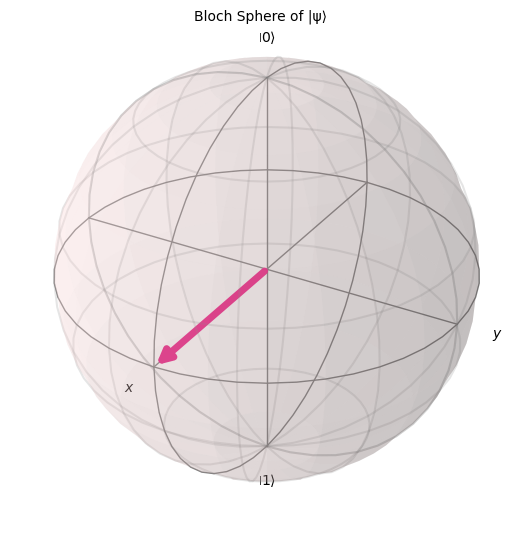

In [4]:
psi = Statevector([params['alpha'], params['beta']])
bloch_vector = generate_bloch_vector(psi=psi)
plot_bloch_vector(bloch_vector, title="Bloch Sphere of |ψ⟩")

## Qubit Rotation Operations

Like any 3D vector, we can apply rotational operations. If we assume the unit vector $\hat{n} = (n_x, n_y, n_z)$, then we can rotate by $\theta$ about the $\hat{n}$ axis by:
$$
R_{\hat{n}}(\theta) = e^{-i(\theta/2)\hat{n}\cdot\sigma} = \text{cos}(\theta/2)I - i\text{sin}(\theta/2)(n_x\sigma_x+n_y\sigma_y+n_y\sigma_y) \tag{8}
$$
where:
- $I$ is the identity matrix
- $\sigma_x$, $\sigma_y$, $\sigma_z$ are the Pauli matrices

We can take equation 8 to define rotations about the $x$, $y$, and $z$ axes specifically:
$$
R_x(\theta) = e^{-i(\theta/2)\sigma_x} =
\begin{bmatrix}
\text{cos}(\theta/2) && -i\text{sin}(\theta/2) \\
-i\text{sin}(\theta/2) && \text{cos}(\theta/2)
\end{bmatrix} \tag{9}
$$
$$
R_y(\theta) = e^{-i(\theta/2)\sigma_y} =
\begin{bmatrix}
\text{cos}(\theta/2) && -\text{sin}(\theta/2) \\
-\text{sin}(\theta/2) && \text{cos}(\theta/2)
\end{bmatrix} \tag{10}
$$
$$
R_z(\theta) = e^{-i(\theta/2)\sigma_z} =
\begin{bmatrix}
e^{-i(\theta/2)} && 0 \\
0 && e^{-i(\theta/2)}
\end{bmatrix} \tag{11}
$$

The following code will allow us to define a qubit and rotating about an axis ($x$, $y$, or $z$) by an angle (in radians, not degrees).

In [5]:
params = {
    'alpha': 1/np.sqrt(2),
    'beta': 1/np.sqrt(2)*1j,
    'axis': 'x',
    'angle': np.pi/2,
}

In [6]:
def rotate_qubit(psi: Statevector, axis: str, angle: float) -> QuantumCircuit:
    qc = QuantumCircuit(1)
    qc.initialize(psi, 0)

    if axis == "x":
        qc.rx(angle, 0)
    elif axis == "y":
        qc.ry(angle, 0)
    elif axis == "z":
        qc.rz(angle, 0)
    else:
        raise ValueError("Invalid axis")

    return qc

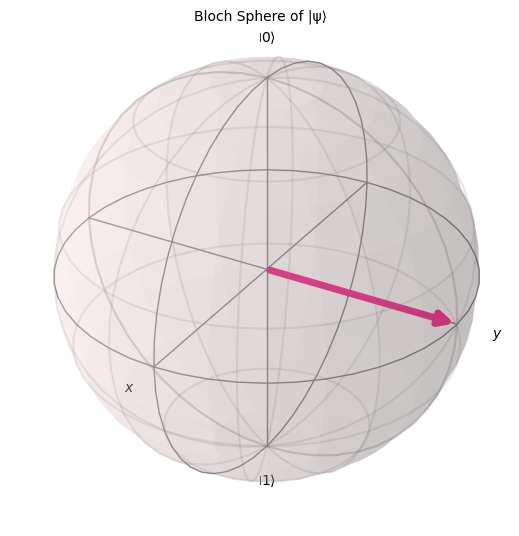

In [7]:
psi = Statevector([params['alpha'], params['beta']])
init_bloch_vector = generate_bloch_vector(psi=psi)
plot_bloch_vector(init_bloch_vector, title="Bloch Sphere of |ψ⟩")

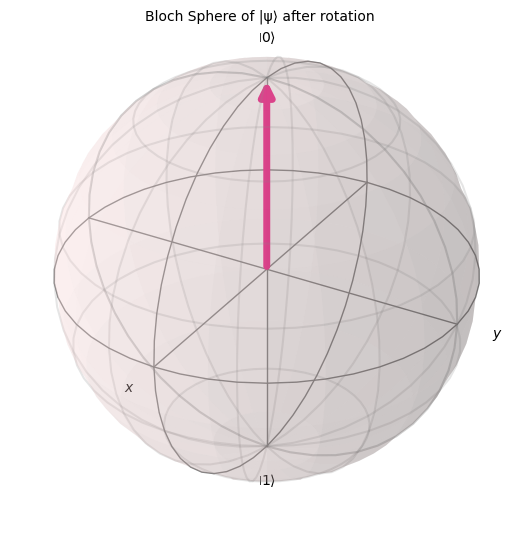

In [8]:
qc = rotate_qubit(psi=psi, axis=params['axis'], angle=params['angle'])
final_state = Statevector.from_instruction(qc)
final_bloch_vector = generate_bloch_vector(final_state)
plot_bloch_vector(final_bloch_vector, title="Bloch Sphere of |ψ⟩ after rotation")

By performing the rotation operations we actually created our first quantum circuit! Running the next code block will show the circuit used to rotate our qubit.

In [9]:
print(qc)

   ┌──────────────────────────────┐┌─────────┐
q: ┤ Initialize(0.70711,0.70711j) ├┤ Rx(π/2) ├
   └──────────────────────────────┘└─────────┘


Our circuit has two elements present, first we initialize our qubit to the defined $\alpha$ and $\beta$ as described by equation 1 and second we apply the rotation gate $R_{\hat{n}}(\theta)$ where $\hat{n}$ is the rotation axis.

# Single Quantum Gates

These rotation gates are not the only type of quantum gates found in circuits. To draw parallels to classical logic circuits, there exist fundamental logic operations that we can apply to qubits.

The following code will allow us to define a qubit to be applied to all the single quantum gates independently as described below.

In [74]:
params = {
    'alpha': 1/np.sqrt(2),
    'beta': 1/np.sqrt(2)*1j,
}

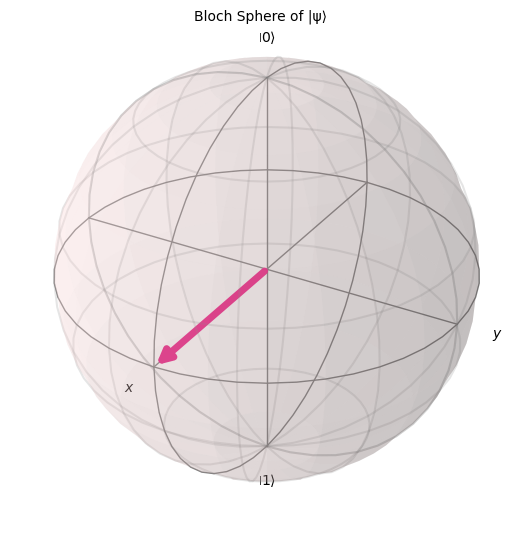

In [11]:
psi = Statevector([params['alpha'], params['beta']])
bloch_vector = generate_bloch_vector(psi=psi)
plot_bloch_vector(bloch_vector, title="Bloch Sphere of |ψ⟩")

## Pauli-X Gate

The Pauli-X gate ($X$) acts as a quantum NOT gate as it will flip the bit.
A classical input bit of 1 into a NOT gate will result in an output of 0 and an input of 0 will result in an output of 1. The Pauli-X gate in matrix form is the following:
$$
X = \begin{bmatrix}
0 && 1 \\
1 && 0
\end{bmatrix} \tag{12}
$$

Applying this gate to the qubit $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ will flip the amplitudes $\alpha$ and $\beta$ such that:
 $$
 X|\psi\rangle = \alpha|1\rangle + \beta|0\rangle \tag{13}
 $$

Looking at equation 13, we can see that the Pauli-X gate simply maps $|0\rangle \rightarrow |1\rangle$ and $|1\rangle \rightarrow |0\rangle$, thus acting as the bit flip.

In [12]:
def pauli_x_gate(psi: Statevector) -> QuantumCircuit:
    qc = QuantumCircuit(1)
    qc.initialize(psi, 0)

    qc.x(0)

    return qc

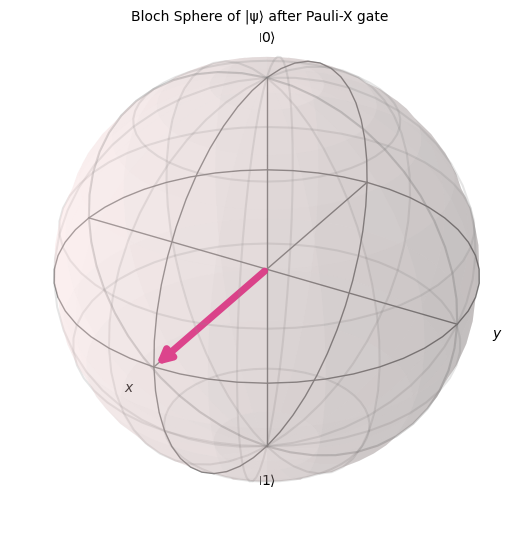

In [13]:
qc = pauli_x_gate(psi=psi)
final_state = Statevector.from_instruction(qc)
final_bloch_vector = generate_bloch_vector(final_state)
plot_bloch_vector(final_bloch_vector, title="Bloch Sphere of |ψ⟩ after Pauli-X gate")

In [14]:
print(qc)

   ┌─────────────────────────────┐┌───┐
q: ┤ Initialize(0.70711,0.70711) ├┤ X ├
   └─────────────────────────────┘└───┘


## Pauli-Z Gate

The Pauli-Z gate ($Z$) acts as a phase flip gate. This gate will change relative phase between the $|0\rangle$ and $|1\rangle$, but will not change the basis states. The gate in matrix form is the following:
$$
Z = \begin{bmatrix}
1 && 0 \\
0 && -1
\end{bmatrix} \tag{14}
$$

Applying this gate to the qubit $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ will change the phases such that:
 $$
 Z|\psi\rangle = \alpha|0\rangle - \beta|1\rangle \tag{15}
 $$

 Looking at equation 15, we can see that the Pauli-Z gate simply maps $|0\rangle \rightarrow |0\rangle$ and $|1\rangle \rightarrow -|1\rangle$, thus creating a phase flip.

In [15]:
def pauli_z_gate(psi: Statevector) -> QuantumCircuit:
    qc = QuantumCircuit(1)
    qc.initialize(psi, 0)

    qc.z(0)

    return qc

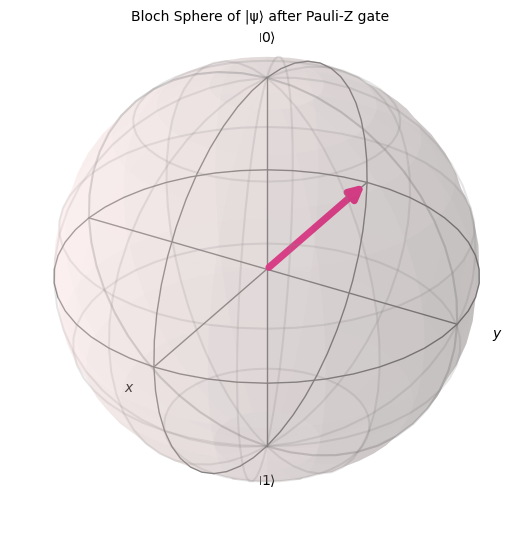

In [16]:
qc = pauli_z_gate(psi=psi)
final_state = Statevector.from_instruction(qc)
final_bloch_vector = generate_bloch_vector(final_state)
plot_bloch_vector(final_bloch_vector, title="Bloch Sphere of |ψ⟩ after Pauli-Z gate")

In [17]:
print(qc)

   ┌─────────────────────────────┐┌───┐
q: ┤ Initialize(0.70711,0.70711) ├┤ Z ├
   └─────────────────────────────┘└───┘


## Pauli-Y Gate

The Pauli-Y gate ($Y$) is a combination of both the Pauli-X and Pauli-Z gates. This means that the Pauli-Y gate applies both a bit flip plus a phase shift. The gate in matrix form is the following:
$$
Y = \begin{bmatrix}
0 && -i \\
i && 0
\end{bmatrix} \tag{16}
$$

Applying this gate to the qubit $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ will change the phases and flip the amplitudes $\alpha$ and $\beta$ such that:
 $$
 Y|\psi\rangle = i\alpha|1\rangle - i\beta|0\rangle \tag{17}
 $$
  Looking at equation 17, we can see that the Pauli-Y gate simply maps $|0\rangle \rightarrow -i|1\rangle$ and $|1\rangle \rightarrow i|0\rangle$, thus both flipping the bits and creating a phase shift.

In [18]:
def pauli_y_gate(psi: Statevector) -> QuantumCircuit:
    qc = QuantumCircuit(1)
    qc.initialize(psi, 0)

    qc.y(0)

    return qc

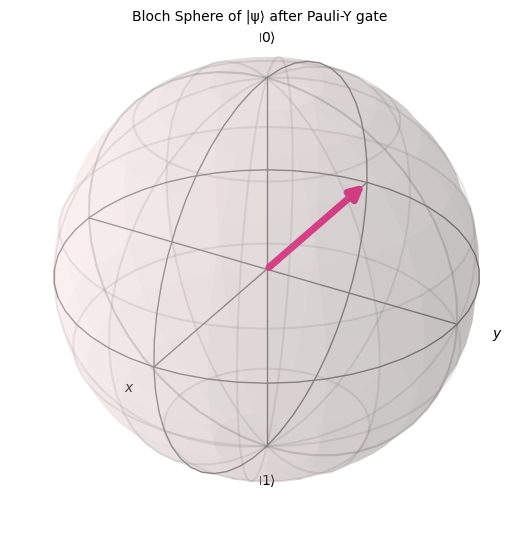

In [19]:
qc = pauli_y_gate(psi=psi)
final_state = Statevector.from_instruction(qc)
final_bloch_vector = generate_bloch_vector(final_state)
plot_bloch_vector(final_bloch_vector, title="Bloch Sphere of |ψ⟩ after Pauli-Y gate")

In [20]:
print(qc)

   ┌─────────────────────────────┐┌───┐
q: ┤ Initialize(0.70711,0.70711) ├┤ Y ├
   └─────────────────────────────┘└───┘


## Hadamard Gate

The hadamard gate ($H$)  is one of the most famous quantum gates. The gate in matrix form is the following:
$$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 && 1 \\
1 && -1
\end{bmatrix} = \frac{1}{\sqrt{2}}(\sigma_{x}+\sigma_{z})\tag{18}
$$

Why is the hadamard gate so important? If we define new basis $|+\rangle$ and $|-\rangle$ such as:
$$
|+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}\tag{19}
$$
and
$$
|-\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}\tag{20}
$$
Then, the hadamard gate simply maps $|0\rangle \rightarrow |+\rangle$ and $|1\rangle \rightarrow |-\rangle$. These two additional states $|+\rangle$ and $|-\rangle$ will be important when generating an equal superpositions of $|0\rangle$ and $|1\rangle$.

In [21]:
def hadamard_gate(psi: Statevector) -> QuantumCircuit:
    qc = QuantumCircuit(1)
    qc.initialize(psi.data, 0)

    qc.h(0)

    return qc

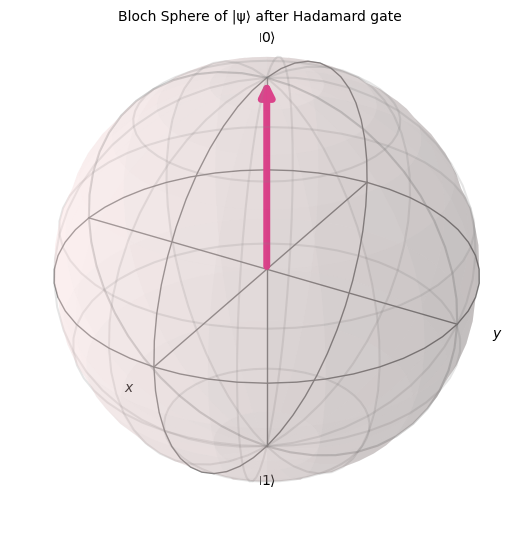

In [22]:
qc = hadamard_gate(psi=psi)
final_state = Statevector.from_instruction(qc)
final_bloch_vector = generate_bloch_vector(final_state)
plot_bloch_vector(final_bloch_vector, title="Bloch Sphere of |ψ⟩ after Hadamard gate")

In [23]:
print(qc)

   ┌─────────────────────────────┐┌───┐
q: ┤ Initialize(0.70711,0.70711) ├┤ H ├
   └─────────────────────────────┘└───┘


In [24]:
print(qc)

   ┌─────────────────────────────┐┌───┐
q: ┤ Initialize(0.70711,0.70711) ├┤ H ├
   └─────────────────────────────┘└───┘


## S Gate

The S gate ($S$)

In [25]:
def s_gate(psi: Statevector) -> QuantumCircuit:
    qc = QuantumCircuit(1)
    qc.initialize(psi.data, 0)

    qc.s(0)

    return qc

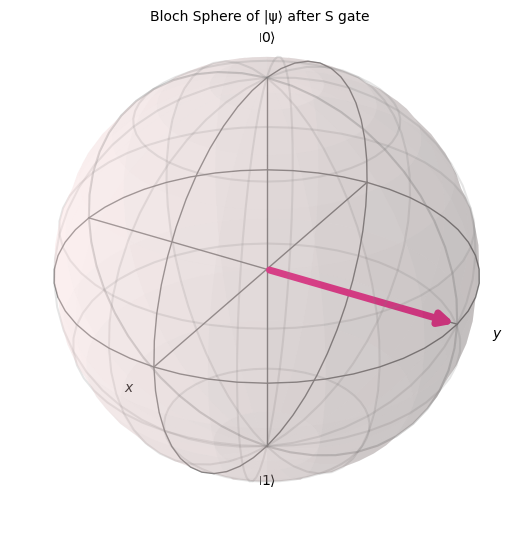

In [26]:
qc = s_gate(psi=psi)
final_state = Statevector.from_instruction(qc)
final_bloch_vector = generate_bloch_vector(final_state)

plot_bloch_vector(final_bloch_vector, title="Bloch Sphere of |ψ⟩ after S gate")

## T Gate

Text

In [27]:
def t_gate(psi: Statevector) -> QuantumCircuit:
    qc = QuantumCircuit(1)
    qc.initialize(psi.data, 0)

    qc.t(0)

    return qc

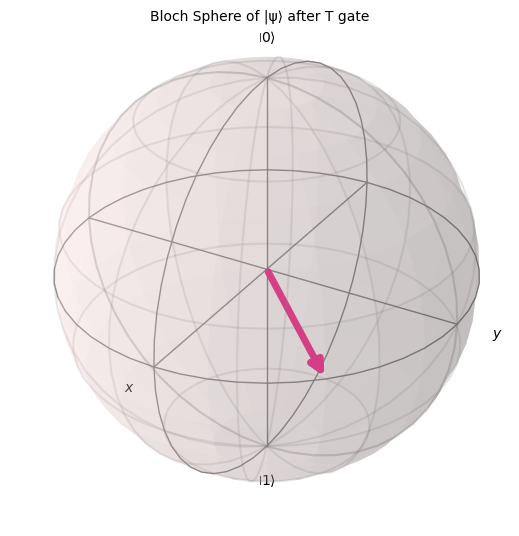

In [28]:
qc = t_gate(psi=psi)
final_state = Statevector.from_instruction(qc)
final_bloch_vector = generate_bloch_vector(final_state)

plot_bloch_vector(final_bloch_vector, title="Bloch Sphere of |ψ⟩ after T gate")

In [29]:
print(qc)

   ┌─────────────────────────────┐┌───┐
q: ┤ Initialize(0.70711,0.70711) ├┤ T ├
   └─────────────────────────────┘└───┘


# Multiple Quantum Gates

The following cell will allow for applying multiple quantum gates in series to be performed on a single qubit as described above. The `gates` parameter is a list of gates that will build the circuit by performing operations left to right. Below are the strings/tuples that correspond to each gate:
- `x` -> Pauli-X gate
- `y` -> Pauli-Y gate
- `z` -> Pauli-Z gate
- `h` -> Hadamard Gate
- `s` -> S Gate
- `t` -> T Gate
- (`rx`, theta) -> Rotation X Gate by Theta
- (`ry`, theta) -> Rotation Y Gate by Theta
- (`rz`, theta) -> Rotation Z Gate by Theta

Note: choosing any of the rotation gates will require a tuple with the corresponding angle in radians attached.



The following code will show the initial/final Bloch spheres along with the quantum circuit.

In [100]:
params = {
    'alpha': 1/np.sqrt(2),
    'beta': 1/np.sqrt(2)*1j,
    'gates': ['t', 's', 'h', ('rz', np.pi/2), 'z', ('ry', -np.pi/8)],
}

In [92]:
def run_multi_gates(psi: Statevector, gates: List) -> QuantumCircuit:
    qc = QuantumCircuit(1)
    qc.initialize(psi.data, 0)

    for gate in gates:
        if isinstance(gate, str):
            if gate == 'x':
                qc.x(0)
            elif gate == 'y':
                qc.y(0)
            elif gate == 'z':
                qc.z(0)
            elif gate == 'h':
                qc.h(0)
            elif gate == 's':
                qc.s(0)
            elif gate == 't':
                qc.t(0)
            else:
                raise TypeError(f'Unknown gate: {gate}')
        elif isinstance(gate, tuple):
            if isinstance(gate[1], (int, float)):
                if gate[0] == 'rx':
                    qc.rx(gate[1], 0)
                elif gate[0] == 'ry':
                    qc.ry(gate[1], 0)
                elif gate[0] == 'rz':
                    qc.rz(gate[1], 0)
                else:
                    raise TypeError(f'Unknown gate: {gate[0]}')
            else:
                raise TypeError(f'Improper angle to rotate about: {gate[1]}')
        else:
            raise TypeError(f'Unknown gate: {gate}')

    return qc

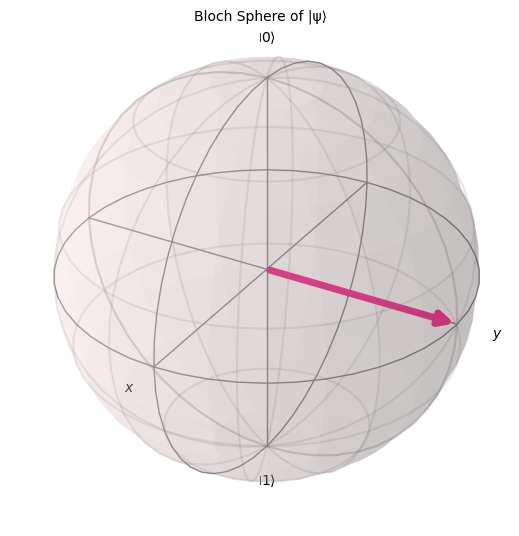

In [97]:
psi = Statevector([params['alpha'], params['beta']])
bloch_vector = generate_bloch_vector(psi=psi)
plot_bloch_vector(bloch_vector, title="Bloch Sphere of |ψ⟩")

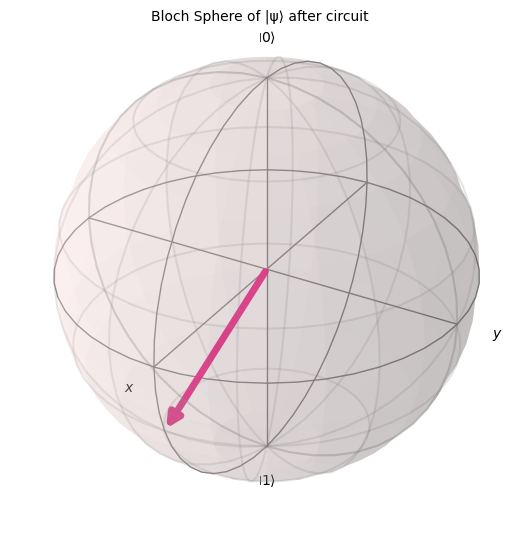

In [101]:
qc = run_multi_gates(psi=psi, gates=params['gates'])
final_state = Statevector.from_instruction(qc)
final_bloch_vector = generate_bloch_vector(final_state)

plot_bloch_vector(final_bloch_vector, title="Bloch Sphere of |ψ⟩ after circuit")

In [102]:
print(qc)

   ┌──────────────────────────────┐┌───┐┌───┐┌───┐┌─────────┐┌───┐┌──────────┐
q: ┤ Initialize(0.70711,0.70711j) ├┤ T ├┤ S ├┤ H ├┤ Rz(π/2) ├┤ Z ├┤ Ry(-π/8) ├
   └──────────────────────────────┘└───┘└───┘└───┘└─────────┘└───┘└──────────┘
